**Task:-**

Iris Flower has three species: setosa, versicolor and virginica, which differs according to their measurements. Now assume that you have measurements of the iris flowers according to their species, and here the task is to train a machine learning model that can learn from measurements of the iris species and classify them.



---



In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!git clone 'https://github.com/dew987/OIBSIP'

fatal: destination path 'OIBSIP' already exists and is not an empty directory.


In [ ]:
# Reading the csv file
dataframe= pd.read_csv('/content/OIBSIP/OASIS Project Data/Iris.csv')

In [ ]:
print(dataframe.head(10))

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
5   6            5.4           3.9            1.7           0.4  Iris-setosa
6   7            4.6           3.4            1.4           0.3  Iris-setosa
7   8            5.0           3.4            1.5           0.2  Iris-setosa
8   9            4.4           2.9            1.4           0.2  Iris-setosa
9  10            4.9           3.1            1.5           0.1  Iris-setosa


In [ ]:
# Printing Information about the dataframe
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
# Description about values in the dataframe
dataframe.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
# x is the feature variables and y is target variable
x= dataframe.iloc[:, :-2].values
y= dataframe['Species'].values
print(x.shape)
print(y.shape)

(150, 4)
(150,)


In [ ]:
# Split the DataFrame into the training and test sets.
# training set contains 70% of the data and testing set contains 30% of the data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.30, random_state= 45)


In [ ]:
# Printing the shape of the train and test datasets

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(105, 4)
(105,)
(45, 4)
(45,)


In [ ]:
# Importing SVM(Support Vector Machine) from sklearn

from sklearn.svm import SVC
model= SVC()
model.fit(x_train, y_train)


SVC()

In [ ]:
# Checking the accuracy of the model using sklearn library accuracy_score function
from sklearn.metrics import accuracy_score

y_predict= model.predict(x_test)
acc_score= accuracy_score(y_test, y_predict)
print(acc_score)

1.0


In [ ]:
# Evaluating the model's performance by calculating the accuracy score and generating a classification 
# report using classification_report() function

from sklearn.metrics import classification_report

repo= classification_report(y_test, y_predict)
print(repo)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        15

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



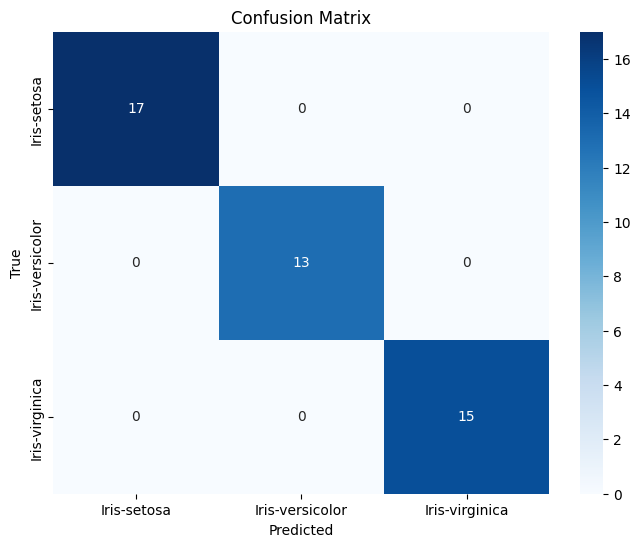

In [ ]:
# Visualizing model performance using heatmap on confusion matrix

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculating the confusion matrix
cm = confusion_matrix(y_test, y_predict)

# Creating a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt= 'd', xticklabels= dataframe['Species'].unique(), yticklabels= dataframe['Species'].unique())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
